# Quick intro on the FIFA World Cup 

[Wikipedia Article](https://en.wikipedia.org/wiki/FIFA_World_Cup)

The FIFA World Cup, often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War. The current champion is France, which won its second title at the 2018 tournament in Russia.

**This notebook was created to derive interesting insights from the data available. [The World Cup dataset](https://www.kaggle.com/abecklas/fifa-world-cup#) shows all information about all the World Cups from 1930 to 2014. The dataset is divided into three parts:**
- **World Cup Matches**: This dataset shows all the results from the matches contested.
- **World Cup Players**: As the name suggests it has the players information.
- **World Cups**: Contains information about the World Cups from 1930 to 2014.

**We have three main steps while trying out things with data:**
- **Preparing and cleaning the data**, what do you mean by cleaning the data? We remove bad rows, rows that dont have suitable data, and things like that,
- **Data Analysis**, we mould the data to our need, for example, the data set may have value A and value B, but we need to find the sum, so in this part we analyse our needs and add A,B.
- **Visualise** and tell a story to the audience.


### Table of Content
- Exploring the tables
- Data Cleaning
- Data Visualisations
 + Attendance per Year
 + Qualifications per Year
 + Goals Scored per Year
 + Matches Played per Year
 + Matches with most attendance
 + Best Performing Teams
 + Best Scoring Team
 + Distribution of Home Team Goals vs Away Team Goals
 + Home Team Win % vs Away Team Win %
 + Winning Hosts
 + Which player has played the most matches at the World Cup?
 + Which coach has won the most matches at the World Cup?

### Code

At first, we import all the libraries required to work on this dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

Creating a dataframe out of the World Cup data.

In [2]:
worldcup_data = pd.read_csv("WorldCups.csv",encoding="latin1")
worldcup_data.head(5) ##showing first 5 enteries in the World Cup Dataset

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


Here’s what the column headers stand for:

**Year**: Year of the world cup

**Country**: Host Country

**Winner**: The team that won the world cup

**RunnersUp**: The team was in second place

**Third**: The team that was in third place

**Fourth**: The team that was in fourth place

**GoalsScored**: Total number of goals scored during the world cup

**Qualified Teams**: Total number of teams that qualified for the world cup

**Matches Played**: Total number of matches played during the worldcup

**Attendance**: Total crowd present during the worldcup

---

In [3]:
matches_data = pd.read_csv("WorldCupMatches.csv",encoding="latin1")
matches_data.head(5) #showing first five matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


Here’s what the column headers stand for:
    
**Year**: Year of the world cup

**Datetime**: The Date on which the match was played along with a 24 hour format time

**Stage**: The stage at which the match was played

**Stadium**: Stadium name where the match was held

**City**: The city name, where the match was played

**Home Team Name**: Home team country name

**Home Team Goals**: Total goals scored by the home team

**Away Team Goals**: Total goals scored by the away team

**Away Team Name**: Away team country name

**Win conditions**: Special win condition (if any)

**Attendance**: Total crowd present at the stadium

**Half-time Home Goals**: Goals scored by the home team until halftime

**Half-time Away Goals**: Goals scored by the away team until halftime

**Referee**: Name of the first referee

**Assistant 1**: Name of the first assistant referee (linesman)

**Assistant 2**: Name of the second assistant referee (linesman)

**RoundID**: Unique ID of the Round

**MatchID**: Unique ID of the match

**Home Team Initials**: Home team country’s three-letter initials

**Away Team Initials**: Away team country’s three-letter initials

---

In [4]:
players_data = pd.read_csv("WorldCupPlayers.csv",encoding="latin1")
players_data.head(5) #showing details of first 5 players

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


Here’s what the column headers stand for:

**RoundID**: Unique ID of the round

**MatchID**: Unique ID of the match

**Team Initials**: Player’s team initials

**Coach Name**: Name and country of the team coach

**Line-up**: S=Line-up, N=Substitute

**Shirt Number**: Shirt number if available

**Player Name**: Name of the player

**Position**: C=Captain, GK=Goalkeeper

**Event**: G=Goal, OG=Own Goal, Y=Yellow Card, R=Red Card, SY = Red Card by the second yellow, P=Penalty, MP=Missed Penalty, I = Substitution In

---

### Data Cleaning

Cleaning data is essential because it gives us the chance to eliminate bad or unavailable data. We will replace columns, or change the format if needed.

In [5]:
worldcup_data['Attendance'] = worldcup_data['Attendance'].str.replace(".", "", regex=False) #replacing the . in attendance numbers
worldcup_data.head(5)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


Checking for NAN values in Matches dataset.

In [6]:
matches_data.tail(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We'll see that the matches dataframe has too many NaN values. We want to only get the rows that have valid entries.

In [7]:
matches_data[~matches_data['Year'].isna()].shape

(852, 20)

Only 852 rows out of 4751 rows are valid, meaning they dont have any NAN values. So we'll just remove those unneccessary rows. Along with removing the rows we will perform other operations like, splitting date and time, fixing country names.

In [8]:
matches_data = matches_data[~matches_data['Year'].isna()].astype({'Year': 'int64','MatchID': 'int64'})
matches_data.tail(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488,NED,CRC
848,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474,BRA,GER
849,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,Cï¿½neyt ï¿½AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490,NED,ARG
850,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502,BRA,NED
851,2014,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501,GER,ARG


There might be redundant data which we will remove now.

In [9]:
matches_data[matches_data.duplicated(keep='last')].shape #finding out the number of redundant columns
#next step would be is to remove them
matches_data.drop_duplicates(inplace=True)

In [10]:
matches_data.shape

(836, 20)

We have removed 16 duplicate rows.

Now we split the Datetime column to two seperate columns Date and Time.

First we split the **Datetime**, then we make two columns consisting of **data** and **time** and concat them into our dataframe, then we change their default column names, and then we remove the Datetime column.

In [11]:
matches_data = pd.concat([matches_data[:],matches_data['Datetime'].str.split('-', expand=True)],axis=1)

In [12]:
matches_data.tail(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,0,1
831,2014,05 Jul 2014 - 13:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1.0,0.0,Belgium,,...,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953.0,300186504,ARG,BEL,05 Jul 2014,13:00
832,2014,29 Jun 2014 - 13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,...,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508,NED,MEX,29 Jun 2014,13:00
833,2014,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),...,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459,CRC,GRE,29 Jun 2014,17:00
834,2014,01 Jul 2014 - 13:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,...,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503,ARG,SUI,01 Jul 2014,13:00
835,2014,01 Jul 2014 - 17:00,Round of 16,Arena Fonte Nova,Salvador,Belgium,2.0,1.0,USA,Belgium win after extra time,...,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255951.0,300186497,BEL,USA,01 Jul 2014,17:00


In [13]:
#renaming 0 and 1 column to Date and Time
matches_data = matches_data.rename(columns={0: 'Date', 1: 'Time'}).drop(columns=['Datetime'])

We add two more columns,
- a Goals column that will show the total number of goals scored per match,
- a Match Outcome column that says which team won the match(home or away).

In [14]:
matches_data['Goals'] = matches_data['Home Team Goals'] + matches_data['Away Team Goals']

In [15]:
#creating a function to determine the winner of each game
def match_outcome(df):
    if df['Home Team Goals'] > df['Away Team Goals']:
        return 'Home Team Win'
    if df['Home Team Goals'] < df['Away Team Goals']:
        return 'Away Team Win'
    return 'Draw'

In [16]:
matches_data['Match Outcome'] = matches_data.apply(lambda x: match_outcome(x), axis=1)
#lamda will send every game to the match_outcome function, which will then add the value to the Match Outcome column

In [17]:
matches_data.head(5)

,Year,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,...,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Date,Time,Goals,Match Outcome
0,1930,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,...,CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096,FRA,MEX,13 Jul 1930,15:00,5.0,Home Team Win
1,1930,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,...,MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090,USA,BEL,13 Jul 1930,15:00,3.0,Home Team Win
2,1930,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,...,VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093,YUG,BRA,14 Jul 1930,12:45,3.0,Home Team Win
3,1930,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,...,LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098,ROU,PER,14 Jul 1930,14:50,4.0,Home Team Win
4,1930,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,...,SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085,ARG,FRA,15 Jul 1930,16:00,1.0,Home Team Win


In [18]:
matches_data['Home Team Name'].value_counts()

Brazil                        78
Italy                         57
Argentina                     52
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: Home Team Name, Length: 78, dtype: int64

Oh well, some names have a random thing with them, so we remove the unneccessary characters.

In [19]:
countries = matches_data[matches_data['Home Team Name'].str.contains('rn">')]['Home Team Name']
countries

414      rn">United Arab Emirates
433       rn">Republic of Ireland
446       rn">Republic of Ireland
452       rn">Republic of Ireland
492       rn">Republic of Ireland
582       rn">Republic of Ireland
647       rn">Trinidad and Tobago
649     rn">Serbia and Montenegro
813    rn">Bosnia and Herzegovina
Name: Home Team Name, dtype: object

In [20]:
#storing the faulty names in a list, so we can iterate through the list and remove the "rn">" string
wrongname = list(countries)
correctname = [country.split('>')[1] for country in wrongname]

In [21]:
#after removing the string
correctname

['United Arab Emirates',
 'Republic of Ireland',
 'Republic of Ireland',
 'Republic of Ireland',
 'Republic of Ireland',
 'Republic of Ireland',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

Even the stadium names have unknown characters, so just like what we did in the above steps, we remove the characters from all faulty names in our dataframe.

In [22]:
oldname = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
newname = ['Germany', 'Maracan Stadium', 'Maracan Stadium']

wrongname = wrongname + oldname
correctname = correctname + newname

In [23]:
wrongname,correctname

(['rn">United Arab Emirates',
  'rn">Republic of Ireland',
  'rn">Republic of Ireland',
  'rn">Republic of Ireland',
  'rn">Republic of Ireland',
  'rn">Republic of Ireland',
  'rn">Trinidad and Tobago',
  'rn">Serbia and Montenegro',
  'rn">Bosnia and Herzegovina',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana'],
 ['United Arab Emirates',
  'Republic of Ireland',
  'Republic of Ireland',
  'Republic of Ireland',
  'Republic of Ireland',
  'Republic of Ireland',
  'Trinidad and Tobago',
  'Serbia and Montenegro',
  'Bosnia and Herzegovina',
  'Germany',
  'Maracan Stadium',
  'Maracan Stadium'])

In [24]:
#functions to change the name in all our dataframes

for index, wr in enumerate(wrongname):
    worldcup_data = worldcup_data.replace(wrongname[index], correctname[index])
    
for index, wr in enumerate(wrongname):
    matches_data = matches_data.replace(wrongname[index], correctname[index])
    
for index, wr in enumerate(wrongname):
    players_data = players_data.replace(wrongname[index], correctname[index])

In [25]:
#checking if every name is cleaned 
matches_data['Home Team Name'].str.contains('rn">')

0      False
1      False
2      False
3      False
4      False
       ...  
831    False
832    False
833    False
834    False
835    False
Name: Home Team Name, Length: 836, dtype: bool

Well this was pretty much a lot of data cleaning, now we will move on to some cool visualisations.

---

### Data Visualisations

Random visualisations don't make sense, someone who is experienced may guess what's going on but not everybody can do so. Along with making visually appealing graphs, we also need to tell a story associated with it. Very basic graphs can be understood through just the label, but description of the graph makes it easier for us to understand.

Let's start with describing what kind of data we will be working with.

In [26]:
worldcup_data.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


**25%, 50% and 75%**  describes the distribution of your data: **50%** should be a value that describes **the middle** of the data, also known as median. **25%, 75% is the border of the upper/lower quarter of the data**. You can get an idea of how skew your data is. 

In [27]:
worldcup_data.Attendance = worldcup_data.Attendance.astype(int)

In [28]:
sns.set_style("whitegrid") #setting theme for our plots

### Attendance per Year

Text(0.5, 1.0, 'Attendance Per Year')

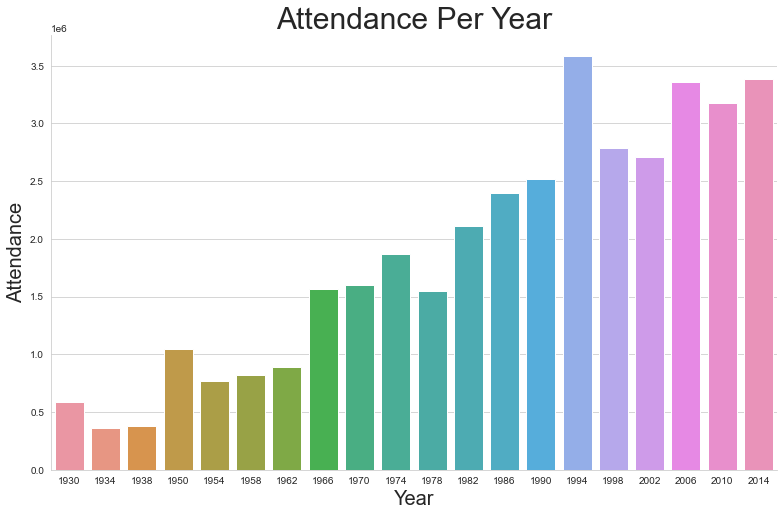

In [29]:
fig, ax = plt.subplots(figsize = (13,8))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'Attendance', data = worldcup_data)
# plt.xticks(rotation = 80)
g.set_xlabel("Year",fontsize=20)
g.set_ylabel("Attendance",fontsize=20)
g.tick_params(labelsize=10)
g.set_title('Attendance Per Year',fontsize=30)

Attendance per world cup has shown massive growth as the years pass. There were no World Cups in the years of the World Wars.

### Qualifications per Year

Text(0.5, 1.0, 'Qualified Teams Per Year')

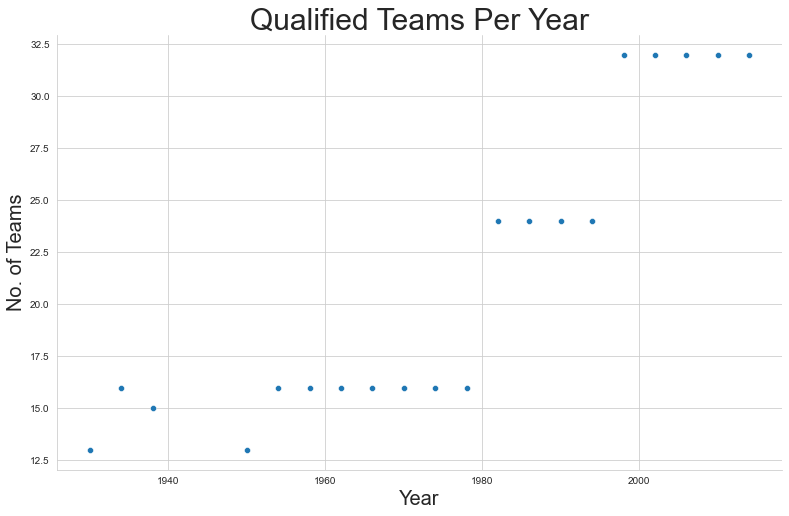

In [30]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (13,8))
sns.despine(right = True)
g = sns.scatterplot(x = 'Year', y = 'QualifiedTeams', data = worldcup_data)
# plt.xticks(rotation = 80)
g.set_xlabel("Year",fontsize=20)
g.set_ylabel("No. of Teams",fontsize=20)
g.tick_params(labelsize=10)
g.set_title('Qualified Teams Per Year',fontsize=30)

Looks like there are four different bunch of qualified teams. 

During the early years, there weren’t as many qualified teams as now. I guess it's because of the conditions at the time were not very favourable to host as many countries.

### Goals Scored Per Year

Text(0.5, 1.0, 'Goals Scored Per Year')

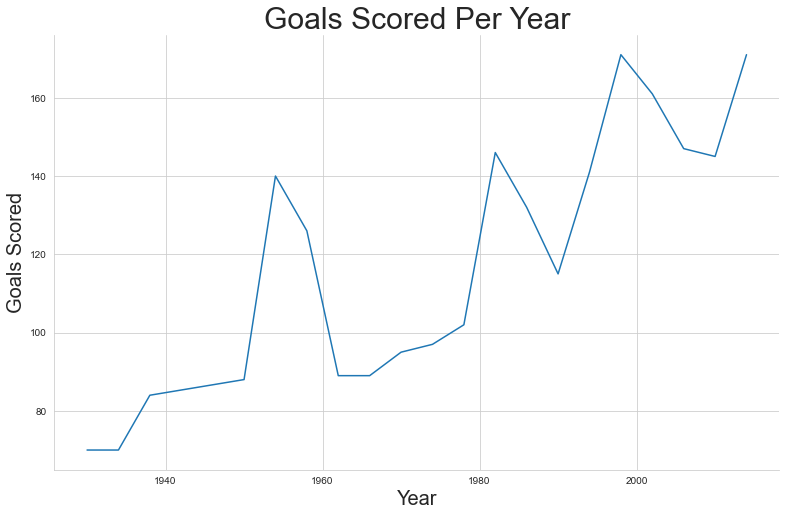

In [31]:
fig, ax = plt.subplots(figsize = (13,8))
sns.despine(right = True)
g = sns.lineplot(x = 'Year', y = 'GoalsScored', data = worldcup_data)
g.set_xlabel("Year",fontsize=20)
g.set_ylabel("Goals Scored",fontsize=20)
g.tick_params(labelsize=10)
g.set_title('Goals Scored Per Year',fontsize=30)

More teams = more goals doesn't make a lot of sense here, although it makes sense in the smaller picture but doesnt tell us why there are fluctuations even though there were good number of teams.

### Matches Player per Year

Text(0.5, 1.0, 'Matches Played per Year')

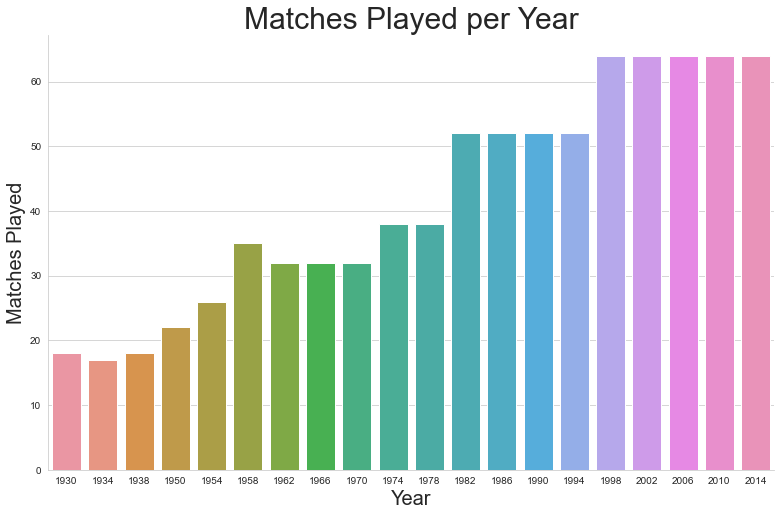

In [32]:
fig, ax = plt.subplots(figsize = (13,8))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = worldcup_data)
g.set_xlabel("Year",fontsize=20)
g.set_ylabel("Matches Played",fontsize=20)
g.tick_params(labelsize=10)
g.set_title('Matches Played per Year',fontsize=30)

The relation between number of teams and number of matches played is pretty linear.

### Which World Cup matches have had the most attendance?

Every WC year we see a sharp rise in the number of people visiting the hosting stadiums to experience the game. Let's look at which matches had the largest crowds.

Text(0.5, 1.0, 'Matches with the highest Attendence')

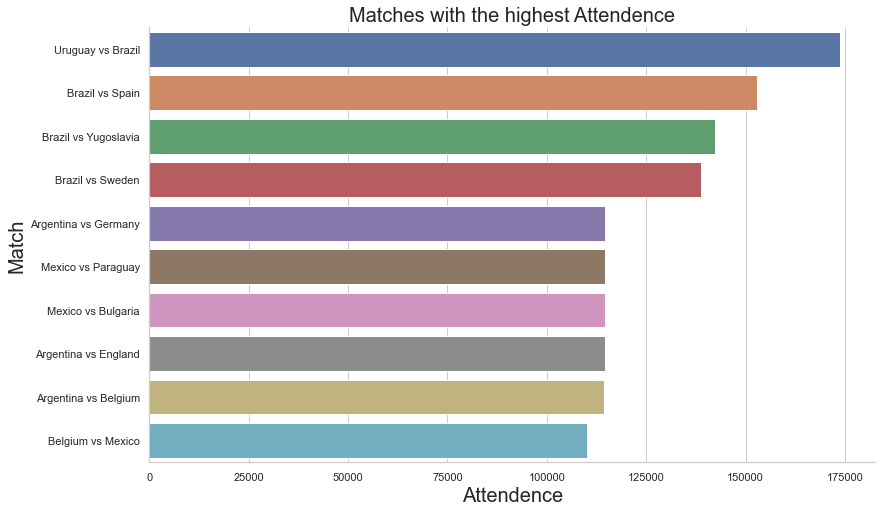

In [99]:
top10 = matches_data.sort_values(by = 'Attendance', ascending = False)[:10]
top10["vs"]=top10["Home Team Name"] + " vs "+ top10["Away Team Name"]

sns.set_style("whitegrid")

ax = sns.barplot(y = top10['vs'], x = top10['Attendance'])
sns.despine(right = True)
plt.ylabel('Match',fontsize=20)
plt.xlabel('Attendence',fontsize=20)
plt.title('Matches with the highest Attendence',fontsize=20)

### Which countries have performed well at the FIFA World Cup

In [33]:
winners = worldcup_data['Winner'].value_counts()
runnersup = worldcup_data['Runners-Up'].value_counts()
thirds = worldcup_data['Third'].value_counts()

In [34]:
teams = pd.concat([winners, runnersup, thirds], axis=1)
teams.fillna(0, inplace=True)
teams = teams.astype(int)
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


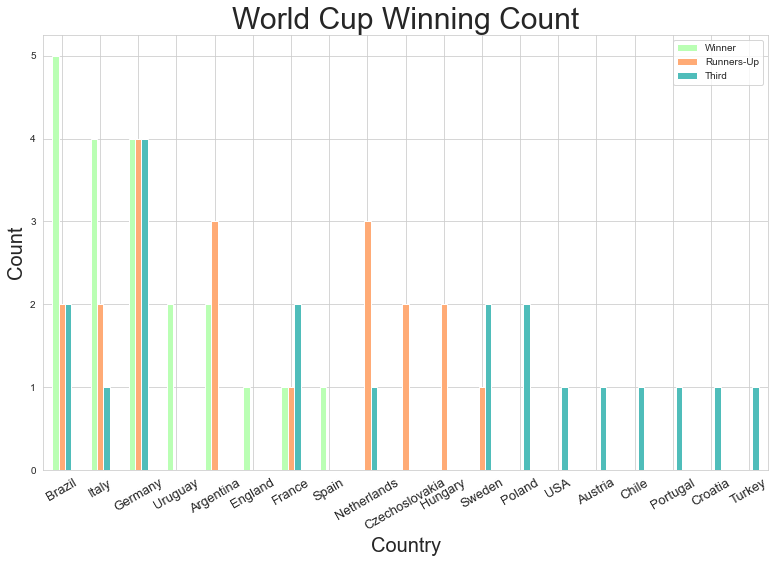

In [41]:
teams[:].plot(kind="bar",figsize=(13,8),color=['#BAFFB4','#FFAB76','#4FBDBA'])

plt.xlabel('Country',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('World Cup Winning Count',fontsize=30)
plt.xticks(fontsize=13,rotation=30)
plt.show()

### Best Scoring Teams at the WC

We will find out home team goals and away team goals (same team is home in few games and away in few games) in that World Cup year, add them to a data frame, find the total number of goals by adding home team goals and away team goals.

In [36]:
home_goals = matches_data.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()
away_goals = matches_data.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()

team_goals = pd.concat([home_goals, away_goals], axis=1)
team_goals.fillna(0, inplace=True)
team_goals['Goals'] = team_goals['Home Team Goals'] + team_goals['Away Team Goals']
team_goals

Home Team Goals  Away Team Goals  Goals
Year                                                     
1930 Argentina               16.0              2.0   18.0
     Belgium                  0.0              0.0    0.0
     Bolivia                  0.0              0.0    0.0
     Brazil                   4.0              1.0    5.0
     Chile                    4.0              1.0    5.0
...                           ...              ...    ...
2014 Russia                   1.0              1.0    2.0
     Spain                    1.0              3.0    4.0
     Switzerland              4.0              3.0    7.0
     USA                      2.0              3.0    5.0
     Uruguay                  3.0              1.0    4.0

[427 rows x 3 columns]

When we create a dataframe, the columns aren't labelled well, so we will reset the index and change the column names.

In [37]:
team_goals = team_goals.reset_index()
team_goals.columns = ['Year', 'Country', 'Home Team Goals', 'Away Team Goals', 'Goals']
team_goals = team_goals.sort_values(by = ['Country', 'Year'], ascending = True)
team_goals

,Year,Country,Home Team Goals,Away Team Goals,Goals
170,1982,Algeria,3.0,2.0,5.0
194,1986,Algeria,1.0,0.0,1.0
363,2010,Algeria,0.0,0.0,0.0
395,2014,Algeria,1.0,6.0,7.0
330,2006,Angola,0.0,1.0,1.0
...,...,...,...,...,...
151,1974,Yugoslavia,9.0,3.0,12.0
193,1982,Yugoslavia,0.0,2.0,2.0
241,1990,Yugoslavia,5.0,3.0,8.0
297,1998,Yugoslavia,1.0,4.0,5.0


After creating the team goals dataframe, we create a seperate dataframe just having the country and goals scored by them, this dataframe will be used for the graph.

In [38]:
goals = team_goals.groupby(['Country'])['Goals'].sum()
goals = goals.sort_values(ascending=False)

### Let's create the graph to check the top 15 scoring teams at the World Cup stages.

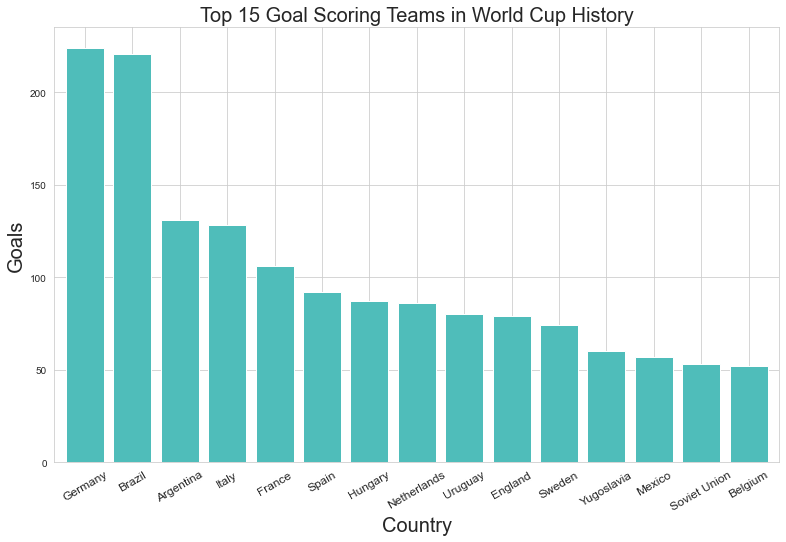

In [39]:
goals[:15].plot(kind="bar",figsize=(13,8),color='#4FBDBA',width=0.8)

plt.xlabel('Country',fontsize=20)
plt.ylabel('Goals',fontsize=20)
plt.title('Top 15 Goal Scoring Teams in World Cup History',fontsize=20)
plt.xticks(rotation=30,fontsize=12)
plt.show()

### How many goals are likely to be scored in a World Cup Match?

We see the number of matches where 1 goal, 2 goals, 3 goals etc have been scored.

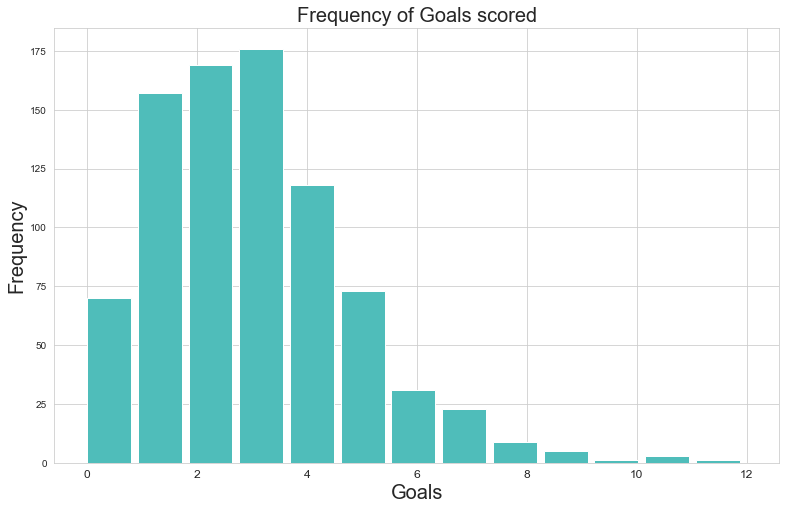

In [40]:
matches_data.Goals.plot(kind = 'hist', figsize=(13,8),color='#4FBDBA',width=0.8,bins = 13)
plt.xlabel('Goals',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.title('Frequency of Goals scored',fontsize=20)
plt.xticks(fontsize=12)
plt.show()

Most World Cup matches have ended with 0 to 5 goals scored. A few matches have about 6 to 9 goals. Some have had 11 goals scored but nothing beyond that.

### Does the home team score more or the away team? Let's look at the distribution.

Text(2, 340, 'Distribution of Away Team Goals')

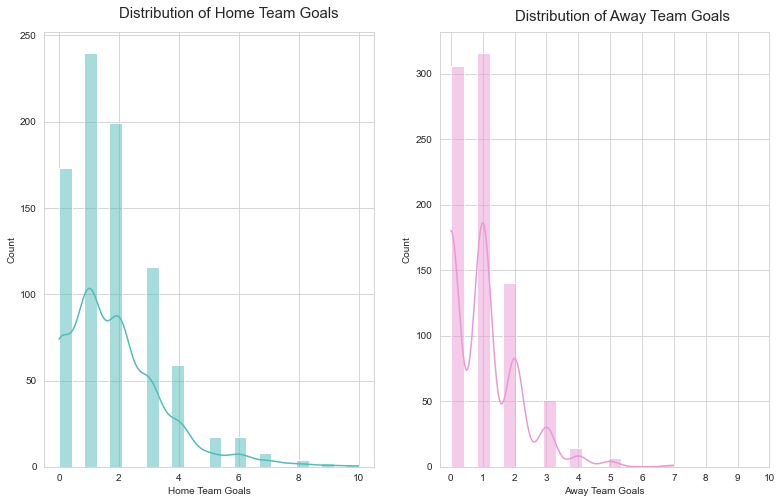

In [60]:
fix,(ax1,ax2) = plt.subplots(ncols=2,figsize=(13,8))

sns.histplot(matches_data["Home Team Goals"], color="#4FBDBA", kde=True, ax=ax1)
plt.xticks(np.arange(0,11,1))
ax1.text(x=2,y=260,s="Distribution of Home Team Goals",fontsize=15)

sns.histplot(matches_data["Away Team Goals"],color="#EA99D5", kde=True, ax=ax2)
plt.xticks(np.arange(0,11,1))
ax2.text(x=2,y=340,s="Distribution of Away Team Goals",fontsize=15)

**The graphs above are useful in visualizing the probability density. The lines give us an idea of the randomness of data.** 

To put it in simpler terms, at home, most teams manage to score at least 1 to 4 goals. While away, most teams struggle to score a goal, those which do, rarely score more than 3. While home team might score 8 goals, the probability of away team scoring 8 is highly unlikely.

### Well now that we know if the home team scores more of the away team, we can also check if the data can backup our findings.

Text(0.5, 1.0, 'Match Outcome')

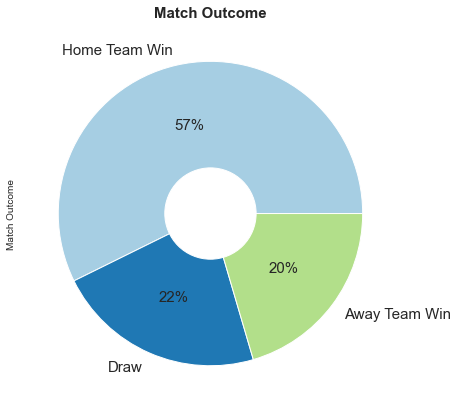

In [67]:
match_outcome = matches_data['Match Outcome'].value_counts()
match_outcome.plot.pie(autopct="%1.0f%%", colors = sns.color_palette("Paired"),figsize=(7,7),fontsize=15)
middle_circle = plt.Circle((0,0), 0.3, color='white')
plt.gca().add_artist(middle_circle)
plt.title("Match Outcome",fontsize=15,fontweight="bold")

### Which countries have hosted the World Cup and won?

In [93]:
winninghosts = worldcup_data[worldcup_data['Winner'] == worldcup_data['Country']][['Year', 'Country']]
winninghosts

,Year,Country
0,1930,Uruguay
1,1934,Italy
7,1966,England
9,1974,Germany
10,1978,Argentina
15,1998,France


---

We have seen a lot about countries, now let's visualise the players dataset.

### Which player has played the most matches at the World Cup?

In [68]:
matches_played = players_data['Player Name'].value_counts().reset_index() #count matches for every player

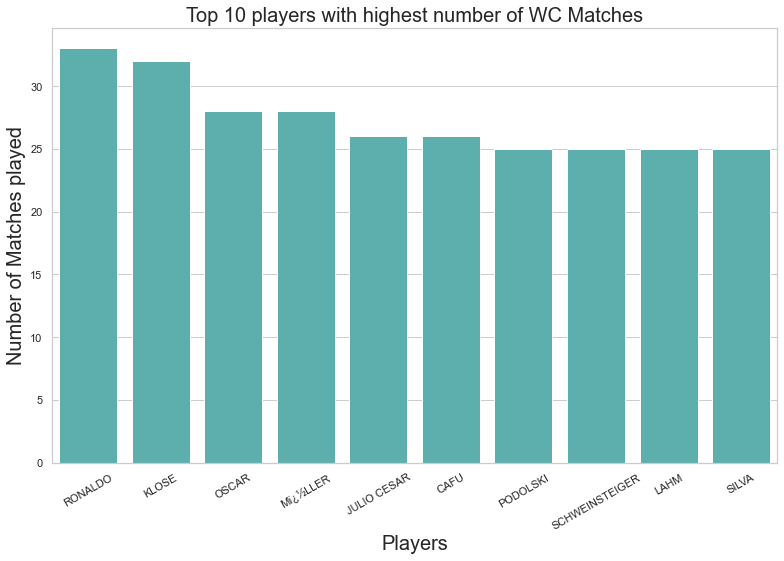

In [100]:
sns.set(rc={'figure.figsize':(13,8)})
sns.set_style("whitegrid")
sns.barplot(data=matches_played.head(10), x='index', y = 'Player Name',color='#4FBDBA')
plt.xlabel("Players",fontsize=20)
plt.ylabel("Number of Matches played",fontsize=20)
plt.xticks(rotation=30)
plt.title("Top 10 players with highest number of WC Matches",fontsize=20)
plt.show()

Ronaldo has played more matches than any other player up until World Cup 2014.

### Which coach has won the most matches at the World Cup?

We first find the coaches and the matches by combining two datasets.

In [81]:
wc_matches = players_data[['MatchID', 'Team Initials', 'Coach Name']].merge(matches_data[['Home Team Initials', 'Away Team Initials','Match Outcome', 'MatchID']], on='MatchID')
wc_matches.head(5)

,MatchID,Team Initials,Coach Name,Home Team Initials,Away Team Initials,Match Outcome
0,1096,FRA,CAUDRON Raoul (FRA),FRA,MEX,Home Team Win
1,1096,MEX,LUQUE Juan (MEX),FRA,MEX,Home Team Win
2,1096,FRA,CAUDRON Raoul (FRA),FRA,MEX,Home Team Win
3,1096,MEX,LUQUE Juan (MEX),FRA,MEX,Home Team Win
4,1096,FRA,CAUDRON Raoul (FRA),FRA,MEX,Home Team Win


The table above has a lot of redundant data, every time a player of a team was on the pitch, it counted the manager of that team, to eliminate this behaviour of our merge, we segregate the table into home and away wins and then combine to for each game.

In [83]:
homewin = wc_matches[['Coach Name','Home Team Initials','MatchID']][(wc_matches['Match Outcome'] == "Home Team Win") & 
                                                                    (wc_matches['Team Initials']==wc_matches['Home Team Initials'])]

In [84]:
awaywin = wc_matches[['Coach Name','Home Team Initials','MatchID']][(wc_matches['Match Outcome'] == "Away Team Win") & 
                                                                    (wc_matches['Team Initials']==wc_matches['Away Team Initials'])]

In [85]:
coach = homewin.merge(awaywin, on='Coach Name')

In [86]:
coach.sort_values(by='Coach Name')

,Coach Name,Home Team Initials_x,MatchID_x,Home Team Initials_y,MatchID_y
166541,ARAGONES Luis (ESP),ESP,97410031,KSA,97410047
166176,ARAGONES Luis (ESP),ESP,97410015,KSA,97410047
166175,ARAGONES Luis (ESP),ESP,97410015,KSA,97410047
166174,ARAGONES Luis (ESP),ESP,97410015,KSA,97410047
166173,ARAGONES Luis (ESP),ESP,97410015,KSA,97410047
...,...,...,...,...,...
28980,ZAGALLO Mario (BRA),BRA,1764,ARG,1945
28981,ZAGALLO Mario (BRA),BRA,1764,ARG,1945
28982,ZAGALLO Mario (BRA),BRA,1764,ARG,1945
28984,ZAGALLO Mario (BRA),BRA,1764,ARG,1945


Now that we have the information about the coach and his home win and away win, we finally remove the duplicate data.

In [87]:
coach.drop_duplicates(keep = 'first', inplace = True)

In [88]:
coach.head()

,Coach Name,Home Team Initials_x,MatchID_x,Home Team Initials_y,MatchID_y
0,HERBERGER Sepp (FRG),FRG,1283,ARG,1323
484,HERBERGER Sepp (FRG),FRG,1284,ARG,1323
968,HERBERGER Sepp (FRG),FRG,1285,ARG,1323
1452,HERBERGER Sepp (FRG),FRG,1233,ARG,1323
1936,HERBERGER Sepp (FRG),FRG,1278,ARG,1323


In [90]:
coachwins = coach['Coach Name'].value_counts().reset_index()
#counting wins by each coach
coachwins.head(10)

,index,Coach Name
0,SCHOEN Helmut (FRG),48
1,SCOLARI Luiz Felipe (BRA),45
2,LOEW Joachim (GER),30
3,PARREIRA Carlos Alberto (BRA),24
4,ZAGALLO Mario (BRA),22
5,MILUTINOVIC Bora (YUG),16
6,SANTANA Tele (BRA),15
7,BEARZOT Enzo (ITA),14
8,BECKENBAUER Franz (GER),12
9,DEL BOSQUE Vicente (ESP),10


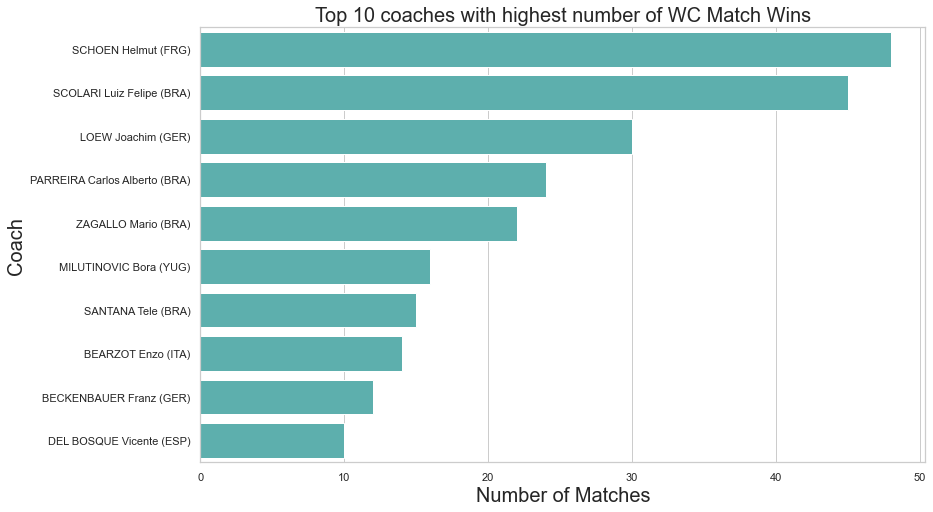

In [101]:
sns.set_style("whitegrid")
sns.barplot(data=coachwins.head(10), x='Coach Name', y = 'index',color='#4FBDBA')
plt.ylabel("Coach",fontsize=20)
plt.xlabel("Number of Matches",fontsize=20)
plt.title("Top 10 coaches with highest number of WC Match Wins",fontsize=20)
plt.show()

Because Germany and Brazil (most especially) have dominated World Cups. Their coaches have seen glory more than any other coaches.

This article was inspired from many other Kaggle Articles. For more info, feel free to check them out ➡️
[Kaggle Articles](https://www.kaggle.com/abecklas/fifa-world-cup/code?datasetId=19728&sortBy=voteCount)